# Flight Price Analytics 

##  Objective
The goal of this project is to analyze flight data to extract insights about:
- Price variation across airlines, routes, and stoppages.
- Relationship between flight duration and ticket price.
- Impact of additional factors (baggage, meals, business class, etc.).
- Identifying the cheapest and most expensive flights.
- Finding noteworthy patterns in flight demand.

##  Steps in the Project
1. Data Import & Cleaning
2. Exploratory Data Analysis (EDA)
3. Key Insights (as per project questions)
4. Visualizations
5. Interesting Facts & Conclusions


## 1. Import Libraries & Load Data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Load dataset
FPA = pd.read_excel(r"C://Users//Dell//Downloads//Data_Train.xlsx")
FPA.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


## 2. Data Cleaning

In [8]:
# Check for missing values
print(FPA.isnull().sum())


Airline            116
Date_of_Journey    116
Source             116
Destination        116
Route              117
Dep_Time           116
Arrival_Time       116
Duration           116
Total_Stops        117
Additional_Info    116
Price              116
dtype: int64


In [5]:
FPA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10799 entries, 0 to 10798
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10683 non-null  object 
 1   Date_of_Journey  10683 non-null  object 
 2   Source           10683 non-null  object 
 3   Destination      10683 non-null  object 
 4   Route            10682 non-null  object 
 5   Dep_Time         10683 non-null  object 
 6   Arrival_Time     10683 non-null  object 
 7   Duration         10683 non-null  object 
 8   Total_Stops      10682 non-null  object 
 9   Additional_Info  10683 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 928.2+ KB


In [10]:
# Handle missing values
FPA["Additional_Info"] = FPA["Additional_Info"].apply(lambda x: "Standard" if x == "No info" else x)
FPA["Additional_Info"]



0        Standard
1        Standard
2        Standard
3        Standard
4        Standard
           ...   
10794         NaN
10795         NaN
10796         NaN
10797         NaN
10798         NaN
Name: Additional_Info, Length: 10799, dtype: object

In [8]:
# Convert Date_of_Journey
FPA["Date_of_Journey"]= pd.to_datetime(FPA["Date_of_Journey"],format="%d/%m/%Y")
FPA["Journey_Day"] = pd.to_datetime(FPA["Date_of_Journey"], format="%d/%m/%Y").dt.day
FPA["Journey_Month"] = pd.to_datetime(FPA["Date_of_Journey"], format="%d/%m/%Y").dt.month

In [9]:
# Extract hours and minutes into separate columns
FPA[["hours", "minutes"]] = FPA["Duration"].str.extract(r"(?:(\d+)h)?\s*(?:(\d+)m)?")

# Replace NaN with 0 and convert to integers
FPA["hours"] = FPA["hours"].fillna(0).astype(int)
FPA["minutes"] = FPA["minutes"].fillna(0).astype(int)

# Total duration in minutes
FPA["Duration_mins"] = FPA["hours"] * 60 + FPA["minutes"]

# Drop helper columns if not needed
FPA= FPA.drop(columns=["hours", "minutes"])

In [10]:
# Convert Price
FPA["Price"] = pd.to_numeric(FPA["Price"], errors="coerce")



In [11]:
FPA.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10799 entries, 0 to 10798
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  float64       
 11  Journey_Day      10683 non-null  float64       
 12  Journey_Month    10683 non-null  float64       
 13  Duration_mins    10799 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int6

## 3. Insights to be Found in Dataset

 Q1.  Number of 
Flights by Stoppages

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64


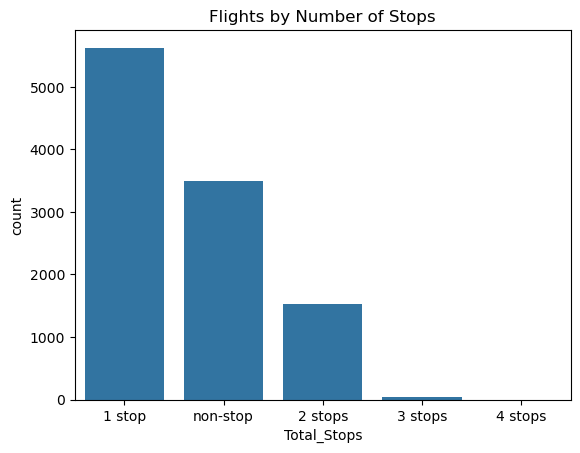

In [12]:
stoppage_counts = FPA["Total_Stops"].value_counts()
print(stoppage_counts)

sns.countplot(x="Total_Stops", data=FPA, order=stoppage_counts.index)
plt.title("Flights by Number of Stops")
plt.show()


Q2. Most Expensive & Cheapest Flights

In [13]:
cheapest = FPA.loc[FPA["Price"].idxmin()]
expensive = FPA.loc[FPA['Price'].idxmax()]

print("Cheapest Flight:\n", cheapest)
print("\nMost Expensive Flight:\n", expensive)


Cheapest Flight:
 Airline                       SpiceJet
Date_of_Journey    2019-03-21 00:00:00
Source                          Mumbai
Destination                  Hyderabad
Route                        BOM → HYD
Dep_Time                         22:45
Arrival_Time              00:10 22 Mar
Duration                        1h 25m
Total_Stops                   non-stop
Additional_Info               Standard
Price                           1759.0
Journey_Day                       21.0
Journey_Month                      3.0
Duration_mins                       85
Name: 4066, dtype: object

Most Expensive Flight:
 Airline            Jet Airways Business
Date_of_Journey     2019-03-01 00:00:00
Source                         Banglore
Destination                   New Delhi
Route                   BLR → BOM → DEL
Dep_Time                          05:45
Arrival_Time                      11:25
Duration                         5h 40m
Total_Stops                      1 stop
Additional_Info          

Q3. Variation of Flight  Prices by Source

           count          mean          std     min     25%      50%      75%  \
Source                                                                          
Banglore  2197.0   8017.464269  5964.303079  3257.0  4544.0   6121.0   8714.0   
Chennai    381.0   4789.892388  2190.219021  3145.0  3597.0   3850.0   5277.0   
Delhi     4537.0  10539.439057  3781.948512  3876.0  7202.0  10262.0  13344.0   
Kolkata   2871.0   9158.389411  3741.997070  3480.0  5192.0   9345.0  12681.0   
Mumbai     697.0   5059.708752  4100.504092  1759.0  2647.0   3342.0   5678.0   

              max  
Source             
Banglore  79512.0  
Chennai   19630.0  
Delhi     52285.0  
Kolkata   31945.0  
Mumbai    25139.0  


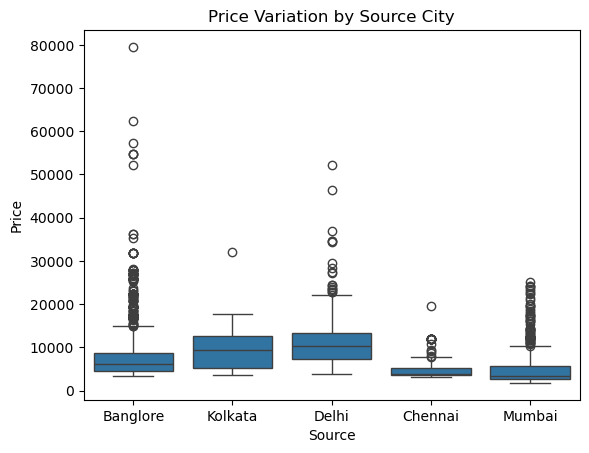

In [14]:
price_by_source = FPA.groupby("Source")["Price"].describe()
print(price_by_source)

sns.boxplot(x="Source", y="Price", data=FPA)
plt.title("Price Variation by Source City")
plt.show()


Q4. Extract Journey Day & Month

Flights by Day:
 Journey_Day
1.0     1075
3.0      848
6.0     1288
9.0     1406
12.0     957
15.0     984
18.0     832
21.0    1111
24.0    1052
27.0    1130
Name: count, dtype: int64
Flights by Month:
 Journey_Month
3.0    2724
4.0    1079
5.0    3466
6.0    3414
Name: count, dtype: int64


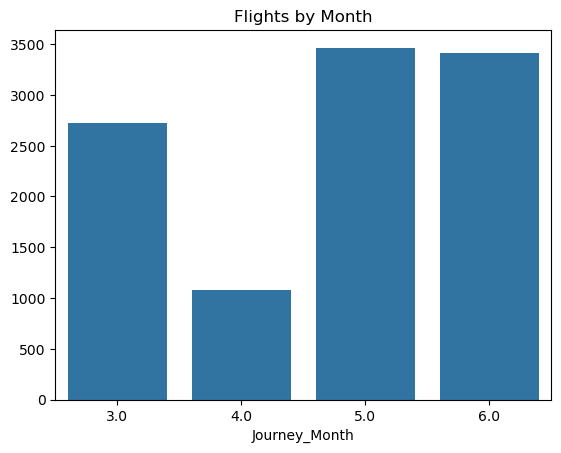

In [15]:
flights_by_day = FPA["Journey_Day"].value_counts().sort_index()
flights_by_month = FPA["Journey_Month"].value_counts().sort_index()

print("Flights by Day:\n", flights_by_day)
print("Flights by Month:\n", flights_by_month)

sns.barplot(x=flights_by_month.index, y=flights_by_month.values)
plt.title("Flights by Month")
plt.show()


Q5. Day & Month with Maximum Stoppages

In [16]:
stop_day = FPA.groupby("Journey_Day")["Total_Stops"].apply(lambda x: (x!="non-stop").sum())
stop_month = FPA.groupby("Journey_Month")["Total_Stops"].apply(lambda x: (x!="non-stop").sum())

print("Day with max stoppages:", stop_day.idxmax(), stop_day.max())
print("Month with max stoppages:", stop_month.idxmax(), stop_month.max())

Day with max stoppages: 9.0 1045
Month with max stoppages: 5.0 2480


Q6. Flight Availability by Source and destination.

Flights by Source:
 Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64


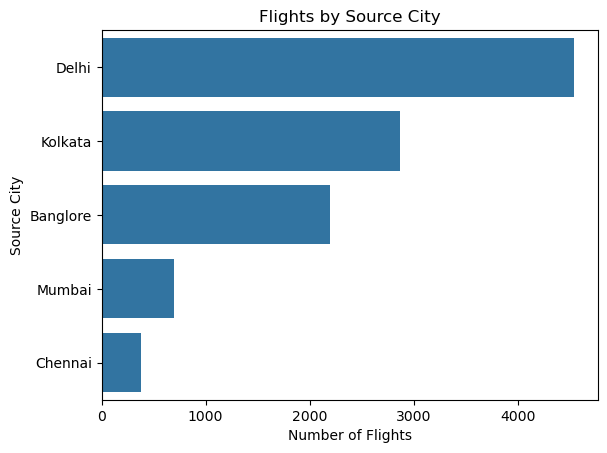

In [17]:
source_counts = FPA["Source"].value_counts()
print("Flights by Source:\n", source_counts)

sns.barplot(x=source_counts.values, y=source_counts.index)
plt.title("Flights by Source City")
plt.xlabel("Number of Flights")
plt.ylabel("Source City")
plt.show()


Q7. Average Price by Airline

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9611.210616
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64


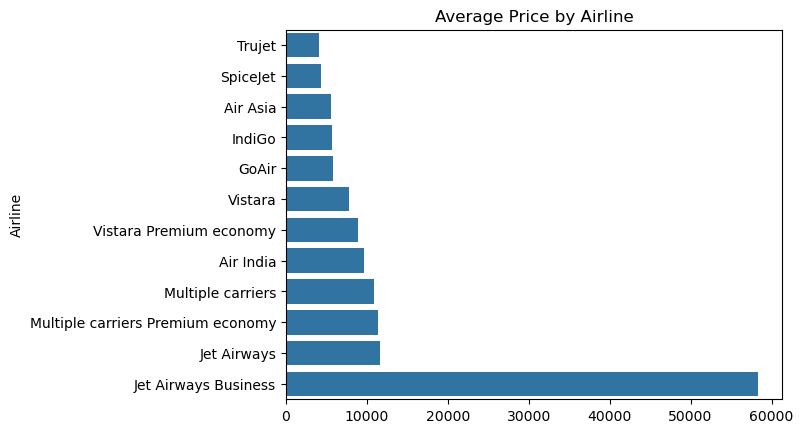

In [18]:
avg_price_airline = FPA.groupby("Airline")["Price"].mean().sort_values()
print(avg_price_airline)

sns.barplot(x=avg_price_airline.values, y=avg_price_airline.index)
plt.title("Average Price by Airline")
plt.show()


Q8. Flight Duration vs Price

Correlation: 0.5063714821960479


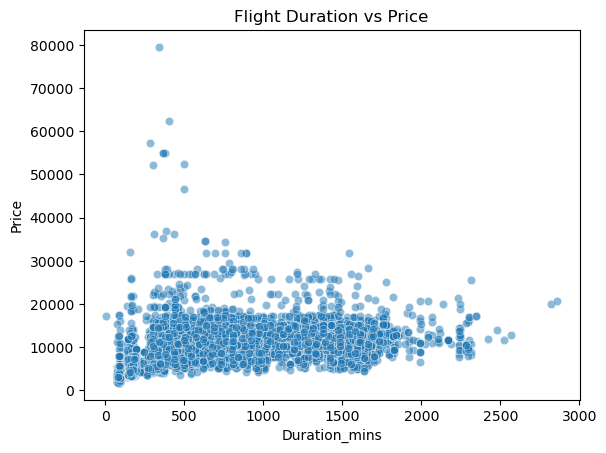

In [19]:
corr = FPA["Duration_mins"].corr(FPA["Price"])
print("Correlation:", corr)

sns.scatterplot(x="Duration_mins", y="Price", data=FPA, alpha=0.5)
plt.title("Flight Duration vs Price")
plt.show()


Q9.Most popular routes

Most Popular Routes:
 Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
CCU → DEL → BLR           565
BLR → BOM → DEL           402
MAA → CCU                 381
DEL → HYD → COK           326
DEL → JAI → BOM → COK     240
Name: count, dtype: int64


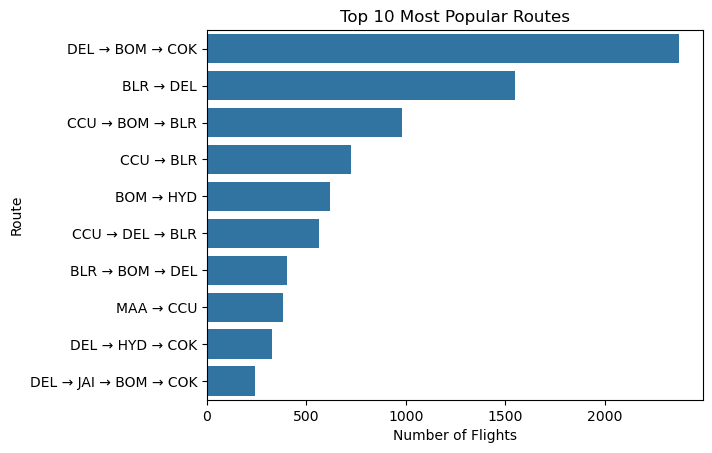

In [20]:
# Top 10 most popular routes
popular_routes = FPA["Route"].value_counts().head(10)
print("Most Popular Routes:\n", popular_routes)
sns.barplot(x=popular_routes.values, y=popular_routes.index)
plt.title("Top 10 Most Popular Routes")
plt.xlabel("Number of Flights")
plt.ylabel("Route")
plt.show()


Q10. Impact of Additional Info

Additional_Info
No check-in baggage included     3645.156250
No Info                          8044.666667
Standard                         9141.320192
In-flight meal not included      9471.834511
Red-eye flight                  10873.000000
Change airports                 16800.714286
1 Long layover                  22109.631579
2 Long layover                  26480.000000
1 Short layover                 26743.000000
Business class                  56811.250000
Name: Price, dtype: float64


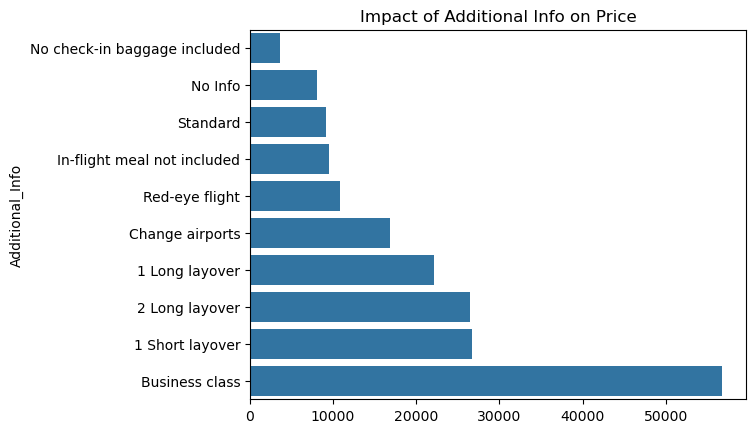

In [21]:
add_info_price = FPA.groupby("Additional_Info")["Price"].mean().sort_values()
print(add_info_price)

sns.barplot(x=add_info_price.values, y=add_info_price.index)
plt.title("Impact of Additional Info on Price")
plt.show()


Q11. Interesting Facts

In [22]:
fact = FPA.groupby("Total_Stops")["Price"].mean().sort_values()
print("Average price by Stops:\n", fact)

#  Non-stop sometimes cheaper than 1-stop


Average price by Stops:
 Total_Stops
non-stop     5024.900315
1 stop      10594.123556
2 stops     12715.807895
3 stops     13112.000000
4 stops     17686.000000
Name: Price, dtype: float64


### Key Findings:
- Most flights have 1 stop, followed by non-stop.
- The cheapest flight is SpiceJet (Mumbai → Hyderabad) at ~INR 1,759.
- The most expensive is Jet Airways Business (Delhi → Cochin) at ~INR 54,815.
- Delhi has the highest median flight prices; Kolkata & Chennai are cheaper sources.
- No strong correlation between flight duration & ticket price.
- Additional Info strongly impacts price (Business class >> Budget options).
- Interesting fact: Non-stop flights can be cheaper than 1-stop due to demand.

###  Conclusion:
Flight prices depend more on **airline, class, and route** than on duration.
